# Introducción a Python para IA.

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Introducción a Python para IA</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

# Objetivos.

Revisar los conceptos de Matplotlib y el uso de varias de sus funciones.

# Introducción.

**Matplotlib** es una biblioteca de Python multiplataforma para generar gráficos (plots) en dos dimensiones con las siguientes características: 

* Se puede usar en una variedad de ámbitos:
    - Scripts de Python, Shells de IPython, Notebooks de Jupyter, Aplicaciones para Web e Interfaces Gráficas de Usuario (GUI). 
* Se puede usar para desarrollar aplicaciones profesionales.
* Puede generar varios tipos de formatos de figuras y videos:
    - png, jpg, svg, pdf, mp4, ...
* Tiene un soporte limitado para realizar figuras en 3D.
* Puede combinarse con otras bibliotecas y aplicaciones para extender su funcionalidad.

**Arquitectura** de tres capas:
* **Scripting**: API para crear gráficas.
    - Provee de una interfaz simple para crear gráficas.
    - Está orientada a usuarios sin mucha experiencia en la programación.
    - Es lo que se conoce como el API de pyplot.
* **Artist**: Hace el trabajo interno de creación de los elementos de la gráfica.
   - Los Artist (¿artesanos?) dibujan los elementos de la gráfica.
   - Cada elemento que se ve en la gráfica es un Artist.
   - Provee de un API orientado a objetos muy flexible.
   - Está orientado a programadores expertos para crear aplicaciones complejas.
* **Backend**: El lugar donde se despliega la gráfica. Las gráficas se envían a un dispositivo de salida. Puede ser cualquier interfaz que soporta Matplotlib:
   - User interface backends (interactive backends): pygtk, wxpython, tkinter, qt4, macosx, … 
   - Hard-copy backends (non-interactive backends): .png, .svg, .pdf, .ps

# Matplotlib: anatomía de una figura.

[https://matplotlib.org/stable/_images/anatomy.png]
<img src="https://matplotlib.org/stable/_images/anatomy.png" width=500>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Figure
- Representa a la figura completa. 
- Le da seguimiento a todos sus ejes hijos (*Axes*), un puñado de artistas especiales (*titles*, *figure legends*, etc.) y el lienzo (*canvas*).
- Una figura puede tener cualquier número de ejes (*Axes*), y siempre debe haber al menos uno.
- La forma más fácil de crear una figura es con `pyplot`.

In [2]:
# Creación de una figura (pyplot)
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [3]:
print(fig, type(fig), id(fig))

Figure(640x480) <class 'matplotlib.figure.Figure'> 139885307633616


## Axes
- Es la región de la imagen con el espacio para graficar los datos.
- Una figura puede contener muchos objetos de tipo *Axes*, pero un objeto *Axes* solo puede estar en una figura.
- Los objetos *Axes* contienen dos objetos *Axis* (tres en 3D) los cuales se encargan de los límites de los datos.
- Cada objeto *Axes* tiene un título (`set_title())`, un *x-label* (`set_xlabel()`) y un *y-label* (`set_ylabel()`).
- La clase `Axes` y sus funciones miembro son el primer punto de entrada para trabajar con la interface Orientada a Objetos.

Figure(640x480) <class 'matplotlib.figure.Figure'> 139885306022736
Axes(0.125,0.11;0.775x0.77) <class 'matplotlib.axes._axes.Axes'> 139885311588944


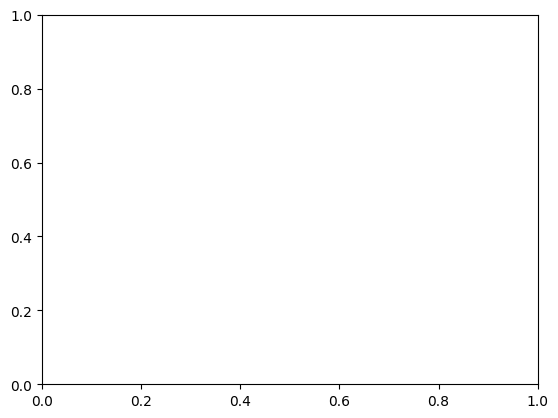

In [4]:
# Obtiene los ejes (Axes) de la figura actual (get current axes)
ax = plt.gca() 

# Obtiene la figura actual
fig = plt.gcf()

print(fig, type(fig), id(fig))
print(ax, type(ax), id(ax))

## Subgráficas en una figura.

Figure(640x480) <class 'matplotlib.figure.Figure'> 139885310848016
Axes(0.125,0.11;0.775x0.77) <class 'matplotlib.axes._axes.Axes'> 139885306467216


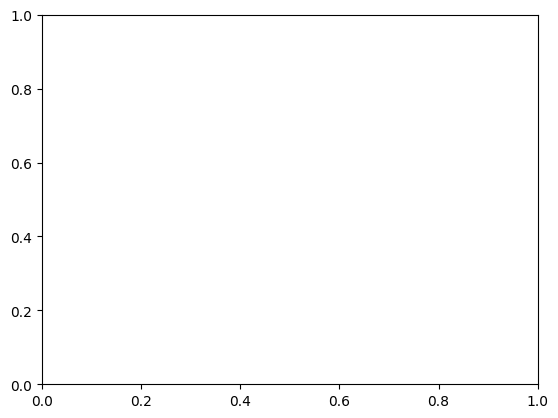

In [5]:
# Genera una subgráfica
fig, ax = plt.subplots(1)

print(fig, type(fig), id(fig))
print(ax, type(ax), id(ax))

Text(0.5, 1.0, 'Ejes 1,1')

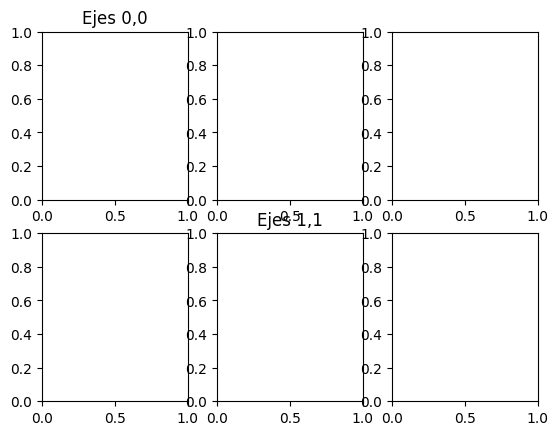

In [6]:
# Genera 6 subgráficas, arreglo de 2 renglones por tres columnas
fig, axes = plt.subplots(2,3)

# Se puede usar cada conjunto de ejes por separado
axes[0,0].set_title('Ejes 0,0')
axes[1,1].set_title('Ejes 1,1')

In [ ]:
print(axes[0,1], type(axes[0,1]), id(axes[0,1]))

## Axis
- Estos son objetos del tipo línea numerada. 
- Se encargan de configurar los límites de la gráfica y de generar las marcas sobre los ejes (*ticks*) y las etiquetas sobre esas marcas (*ticklabels*).
- El lugar donde se ponen esas marcas se determina por un objeto `Locator` y las cadenas de las etiquetas son formateadas por un objeto `Formatter`.
- La combinación de los objetos `Locator` y `Formatter` adecuados dan un control muy fino sobre el lugar de los *ticks* y sus *ticklabels*.


([<matplotlib.axis.YTick at 0x7f3993ae1e10>,
 [Text(0, 0.0, 'A'), Text(0, 1.0, 'B')])

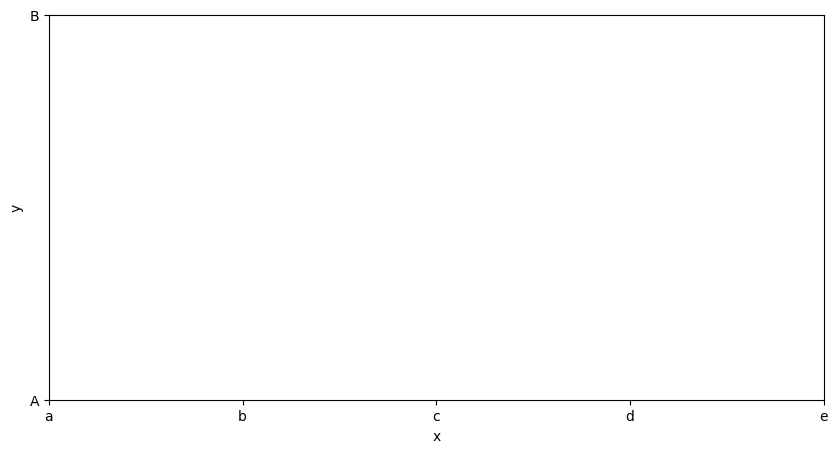

In [7]:
# Generación de las etiquetas de los ejes, los ticks y los tickslabels.
fig = plt.figure(figsize=(10,5))
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(ticks=np.linspace(0,1,5), labels=['a', 'b', 'c', 'd', 'e'])
plt.yticks(ticks=np.linspace(0,1,2), labels=['A', 'B'])
#plt.show()

## Artist
- Todo lo que se puede ver en la figura es un *Artist*: `Figure`, `Axes` y `Axis`, `Text`, `Line2D`, `collection`, `Patch`, etc.
- Cuando una figura es producida/generada, todos los *Artist* son dibujados sobre el canvas.
- La mayoría de los *Artist* están ligados a objetos de tipo `Axes`, esos *Artist* no se pueden compartir con múltiples `Axes`, ni se pueden mover a otros `Axes`.


### Ejemplo 0. Varios `Artist` en una figura.

In [ ]:
# Figura con una gráfica y varios Artist

# Datos a graficar
x = np.linspace(0,2*np.pi,100)
y = np.sin(4*x)*np.exp(-x)

# La siguiente instrucción crea la figura, aunque no es
# necesario hacer explícita esta creación pues la figura 
# se crea automáticamente con el uso de algunas funciones 
# de matplotlib. Es útil para definir características de
# la figura al inicio, por ejemplo figsize=(,)
plt.figure()

# Graficamos los datos con una línea y le ponemos una etiqueta
plt.plot(x,y, label='$\sin(4 \pi x) e^{-x}$')

# Lo que sigue es la decoración de la figura y de los ejes
plt.suptitle('FIGURA') # título de la figura
plt.title('Onda amortiguada') # título de los ejes
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.legend()

# Despliegue de la gráfica y generación de un archivo
plt.savefig('onda_amortiguada.pdf')
plt.show()

### Ejemplo 1. `plot()` y `scatter()`
Dibujar las funciones $\sin(x)$ , $\cos(x)$ y puntos aleatorios en una sola gráfica en el dominio $(x,y) \in [0,2\pi] \times [-1,1]$.

In [ ]:
# Definimos el dominio para x
x = np.linspace(0,2*np.pi,100)

# Generamos un conjunto de datos aleatorios
r = np.random.rand(2,50)

# Transformamos los datos al dominio de (x,y)
r[0] *= 2*np.pi      # de 0 a 2 * pi
r[1] =  r[1] * 2 - 1 # de -1  a 1

# Lo anterior se puede hacer también con la siguiente operación entre arreglos
# r = np.random.rand(2,50) * np.array([2*np.pi, 2]).reshape(2,1) - np.array([0,1]).reshape(2,1)

# Evaluamos las funciones sin(x) y cos(x)
y1 = np.sin(x)
y2 = np.cos(x)

# Graficamos
plt.plot(x, y1, x, y2)  # Dibuja líneas por omisión
plt.scatter(r[0], r[1], c='C2') # Dibuja marcadores

plt.show()

La gráfica anterior se puede decorar un poco mejor usando las opciones de los *artist* involucrados.

In [ ]:
# Para la gráfica de sin(x), cambiamos el ancho de la línea (lw=3), 
# el color (c='C7') y la etiqueta (label='sin')
plt.plot(x, y1, lw = 3, c='C7', label='sin')

# Para la gráfica de cos(x) solo agregamos la etiqueta (label='cos')
plt.plot(x, y2, label='cos')

# Para los puntos aleatorios calculamos un 'area' para cada marcador.
# Esta área se cálcula de manera pseudo-aleatoria.
area = np.random.rand(50) * 100

# Usamos el área para cambiar el tamaño de cada marcador (s=area),
# cambiamos el mapa de color (cmap='cool'), el color del borde de los
# marcadores lo hacemos de color negro (edgecolor='k'), y le damos una
# transparencia al marcador (alpha=0.5).
plt.scatter(r[0], r[1], s=area, c=area, cmap='cool', edgecolor='k', alpha=0.5)

# Ponemos nombre a los ejes
plt.xlabel('x')
plt.ylabel('y')
# Dibujamos la leyenda
plt.legend()

plt.show()

### Ejemplo 2. `imshow()` y `colorbar()`
Visualizar una imagen. Vamos a usar la biblioteca [*Python Image Library* (PIL)](https://pillow.readthedocs.io/en/stable/) para leer una imagen en formato jpg. 

In [ ]:
from PIL import Image

fjpg = Image.open('../utils/fig/chapulin.jpg')
print(type(fjpg))

In [ ]:
# El contenido de la imagen se puede transformar en un arreglo de numpy.
chapulin = np.asarray(fjpg)
print(type(chapulin))
print(chapulin.shape)
print(repr(chapulin)) 

In [ ]:
# Graficamos al chapulin
plt.imshow(chapulin)
plt.show()

Como el objeto `chapulin` es un objeto de tipo `ndarray`, podemos usar las funciones de numpy sobre él.

In [ ]:
# Obtenmos uno de los canales de la imagen
canal1_chapulin = chapulin[:,:,2]

In [ ]:
plt.imshow(canal1_chapulin)
plt.show()

In [ ]:
# Podemos usar el parámetro cmap para cambiar el mapa de color
plt.imshow(canal1_chapulin, cmap='hot')
plt.show()

In [ ]:
# Podemos agregar una barra de colores
nueva = plt.imshow(canal1_chapulin, cmap='seismic')
plt.colorbar(nueva)
plt.show()

### Ejemplo 3. Ajuste del `colorbar`

Algunas veces la barra de color no se ajusta automáticamente a la figura que representa. Por ejemplo:

In [ ]:
fig = plt.figure(figsize=(5, 5))
im = plt.imshow(chapulin, interpolation="hermite")
plt.colorbar(im)
plt.tight_layout()

Para ajustar el colorbar en esos casos se puede hacer uso de la función `make_axes_locatable` (parte del módulo `axes_divider`). Esta función toma unos ejes existentes, crea un divisor para estos ejes y regresa un objeto de la clase `AxesLocator`. El método `append_axes` de este `AxesLocator` se puede usar para crear unos ejes nuevos en uno de los lados ("top", "right", "bottom", or "left") de los ejes originales

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(5, 5))
im = plt.imshow(chapulin, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(im, cax=cax)
plt.tight_layout()

Cuando se pone el colorbar en la parte superior de la figura, es necesario ajustar la orientación y los ticks:

In [ ]:
fig = plt.figure(figsize=(5, 5))
im = plt.imshow(chapulin, interpolation="none")

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("top", "5%", pad="3%")
plt.colorbar(im, cax=cax, orientation='horizontal')
cax.xaxis.set_ticks_position("top") # Posición de los ticks
plt.tight_layout()

### Ejemplo 4. `hist()`

Crear un histograma con los valores del objeto `canal1_chapulin`.

Para hacer el histograma necesitamos un arreglo 1D, entonces primero debemos cambiar el `shape` del objeto `canal1_chapulin`:

In [ ]:
print(canal1_chapulin.shape)

In [ ]:
canal1_chapulin_flat = canal1_chapulin.flatten()
print(canal1_chapulin_flat.shape)
print(canal1_chapulin_flat)

In [ ]:
# Usamos la función hist() para generar el histogramos, 
# debemos definir cuantas barras queremos (bins=5).
plt.hist(canal1_chapulin_flat, bins=5)
plt.show()

Vamos ahora a mejorar un poco la gráfica:

In [ ]:
# Los parámetros que usamos son los siguientes:
# facecolor = 'C3', color de las barras (es equivalente a fc='C3)
# ec = 'gray', color del contorno (es equivalente a edgecolor='gray')
# alpha = 0.5, transparencia
plt.hist(canal1_chapulin_flat, bins=15, facecolor='C3', ec = 'gray', alpha=0.5)
plt.show()

### Ejemplo 5. Múltiples gráficas `add_subplot()`

Varias subgráficas

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(chapulin)
ax.set_title('Original')
plt.colorbar(ticks=[0,100,200], orientation='horizontal')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(canal1_chapulin, cmap='hot')
ax.set_title('Canal 2')
plt.colorbar(ticks=[0,100,200], orientation='horizontal')

plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(311)
plt.hist(chapulin[:,:,0].flatten(), bins=15, facecolor='C1', ec = 'gray', alpha=0.5)
ax1.set_title('Canal 0')
ax1.set_xticks(np.arange(0,300,25))
ax1.set_yticks(np.arange(0,500000,100000))
ax1.set_ylim(0,475000)

ax2 = fig.add_subplot(312, sharex = ax1, sharey = ax1)
plt.hist(chapulin[:,:,1].flatten(), bins=15, facecolor='C2', ec = 'gray', alpha=0.5)
ax2.set_title('Canal 1')

ax3 = fig.add_subplot(313, sharex = ax1, sharey = ax1)
plt.hist(canal1_chapulin_flat, bins=15, facecolor='C3', ec = 'gray', alpha=0.5)
ax3.set_title('Canal 2')

plt.tight_layout()
plt.show()

### Ejemplo 6. Efecto de `tight_layout`

Algunas veces los títulos, las etiquetas de los ejes o los ticklabels pueden quedar fuera de la gráfica. La función `tight_layout` ayuda a mejorar la posición de estos elementos.

In [ ]:
# Definimos una función para realizar algunas gráficas

def grafica(ax, fontsize=12):
    ax.scatter(r[0], r[1], s=area, c=area, zorder = 2,
               cmap='cool', edgecolor='k', alpha=0.5)
    ax.plot(x, y1, lw = 3, c='C7', label='sin')
    ax.plot(x, y2, label='cos')

    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)

In [ ]:
fig, ax = plt.subplots()
grafica(ax, fontsize=16)
#plt.tight_layout()    # Ajusta la gráfica automáticamente
plt.savefig('figura_tight.pdf')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
grafica(ax1)
grafica(ax2)
grafica(ax3)
grafica(ax4)

#plt.tight_layout() # Ajusta la gráfica automáticamente
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0, rect=[0,0,0.5,1])

plt.savefig('figura_2x2.pdf')

In [ ]:
ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)

grafica(ax1)
grafica(ax2)
grafica(ax3)

#plt.tight_layout() # Ajusta la gráfica automáticamente


### Ejemplo 7. Múltiples gráficas con `subplot2grid`

In [ ]:
# (0,0) (0,1) (0,2)
# (1,0) (1,1) (1,2)
# (2,0) (2,1) (2,2)

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

grafica(ax1)
grafica(ax2)
grafica(ax3)
grafica(ax4)

#plt.tight_layout()

### Ejemplo 8. Múltiples gráficas con `Grispec`

In [ ]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

print(gs, type(gs))

ax = fig.add_subplot(gs[0, :])
grafica(ax)
ax.set_ylabel('y_0')
ax.set_xlabel('x_0')

ax = fig.add_subplot(gs[1, 0])
ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
ax.set_ylabel('y_10')
ax.set_xlabel('x_10')
ax.tick_params(axis='x', rotation=55)

ax = fig.add_subplot(gs[1, 1])
grafica(ax)

plt.show()

### Ejemplo 9. Personalización de los ticks

Existen los *major ticks* y lo *minor ticks* 

In [ ]:
plt.figure(figsize=(6,4))
ax = plt.axes(xscale='log', yscale='log')
plt.xlim(1,1000)
plt.ylim(1,1000)
plt.grid()

Los *major ticks* se ven con una raya más larga y una etiqueta, mientras que cada *minor tick* se muestran con una raya más pequeña y sin etiqueta.

Estas propiedades se pueden personalizar usando objetos `formatter` y `locator` de cada uno de los ejes.

Podemos revisar estos objetos en el ejemplo anterior como sigue:

In [ ]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

In [ ]:
plt.figure(figsize=(5,3))
ax = plt.axes()
grafica(ax)

In [ ]:
plt.figure(figsize=(5,3))
ax = plt.axes()
grafica(ax)

# Esconde las etiquetas de los ticks
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

In [ ]:
plt.figure(figsize=(6,4))
ax = plt.axes()
grafica(ax)

# Esconde los ticks
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

Esconder los `ticks` puede ser útil en algunos casos. Por ejemplo en el siguiente caso: 

#### Visualizando las [Olivetti Faces](https://cam-orl.co.uk/facedatabase.html)

Es un conjunto que contiene fotos de caras tomadas enter abril de 1992 y abril de 1994 en los laboratorios de *AT&T* en Cambridge.


In [ ]:
fig, ax = plt.subplots(6, 6, figsize=(3, 3))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
print(faces.shape)

for i in range(6):
    for j in range(6):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[(1+j+1)*(i+1)+30], cmap="gray")

#### Aumentando o disminuyendo el número de ticks

In [ ]:
# 9 subgráficas que comparten el eje y
fig, ax = plt.subplots(3, 3, sharey=True)
plt.tight_layout()

In [ ]:
# Recorro los ejes y en cada uno aumento los ticks
for i, axi in enumerate(ax.flat):
    axi.xaxis.set_major_locator(plt.MaxNLocator(i+1))
    axi.xaxis.set_major_formatter(plt.NullFormatter())

fig


#### Ticks y Ticklabels más elegantes
https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html

In [ ]:
params = {'text.usetex': True,
          'font.family': 'DejaVu Serif'}
plt.rcParams.update(params)

fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Seno')
ax.plot(x, np.cos(x), lw=3, label='Coseno')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

# Ubicación de los ticks en múltiplos de pi
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
plt.savefig('fig_latex.pdf')

In [ ]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return "$\pi/2$"
    elif N == 2:
        return "$\pi$"
    elif N % 2 > 0:
        return "${0}\pi/2$".format(N)
    else:
        return "${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig
fig.savefig('fig_latex2.pdf')



Opciones para `Locator` y `Formmater`

|Clase `Locator` |Descripción |
|---|---|
|NullLocator | No ticks|
|FixedLocator | Tick locations are fixed|
|IndexLocator | Locator for index plots (e.g., where x = range(len(y)))|
|LinearLocator | Evenly spaced ticks from min to max|
|LogLocator | Logarithmically ticks from min to max|
|MultipleLocator | Ticks and range are a multiple of base|
|MaxNLocator | Finds up to a max number of ticks at nice locations|
|AutoLocator |(Default.) MaxNLocator with simple defaults.|
|AutoMinorLocator 	Locator for minor ticks|

|Clase `Formatter` |Descripción|
|---|---|
|NullFormatter |No labels on the ticks|
|IndexFormatter |Set the strings from a list of labels|
|FixedFormatter |Set the strings manually for the labels|
|FuncFormatter |User-defined function sets the labels|
|FormatStrFormatter |Use a format string for each value|
|ScalarFormatter |(Default.) Formatter for scalar values|
|LogFormatter |Default formatter for log axes|


# Animación de una línea.

La siguiente función genera los puntos de la línea dados $x$ y $t$.

In [ ]:
def funcion(x, t):
    A = 0.95 * np.sin(2 * np.pi * t / 25)  # Amplitud
    return A * np.sinc(x)  # Función: sin(x) / x

Dibujemos un par de curvas:

In [ ]:
x = np.linspace(-3, 3, 61)
plt.plot(x,funcion(x,1)) # curva para t = 1
plt.plot(x,funcion(x,3)) # curva para t = 3
plt.show()

Ahora vamos a dibujar las curvas para $t$ en un rango de $0$ a $25$:

In [ ]:
for t in range(0,25,1):
    plt.plot(x, funcion(x, t))

In [ ]:
# Módulo para crear la animación
from matplotlib.animation import FuncAnimation

#
# Paso 1. Definición de la figura
#
fig = plt.figure(figsize=(5,3))           # Figura
ax = plt.axes(xlim=(-3, 3), ylim=(-1, 1)) # Ejes
#
# Paso 2. Graficación del primer estado de la curva
#
l = plt.plot(x, funcion(x,0))
#
# Paso 3. Definición de una función para actualizar los datos 
# de la curva. Esta función será ejecutada en cada paso de la animación.
#
def plotLine(i, linea, x):
    linea.set_ydata(funcion(x,i)) # cambia los datos en la dirección y
#
# Paso 4. Uso de la función FuncAnimation() para crear la animación
#
anim = FuncAnimation(fig,             # Figura
                     plotLine,        # Función que cambia los datos
                     fargs=(l[0], x), # Argumentos de la funcion plotLine()
                     interval=100,    # Intervalo entre cuadros [ms]
                     frames=25,       # Total de cuadros
                     repeat=True)     # Animación en un ciclo

plt.show()

In [ ]:
# Desplegamos la animación
from IPython.display import HTML
HTML(anim.to_jshtml())